# 1. Introduction


This data science project investigates the impact of remote work on mental health among employees across different industries and roles. The dataset includes various factors such as:

Demographics (age, gender, region)

Employment details (job role, work location, industry)

Lifestyle (hours worked, physical activity, sleep quality)

Mental health metrics (conditions, stress levels, access to resources)

Productivity, satisfaction, and social isolation levels

The main goals of this project are:

Explore how remote work correlates with mental health conditions.

Identify patterns in stress, productivity, and work-life balance.

Discover which factors contribute to better mental health in remote environments.

Propose data-driven recommendations to employers and policymakers.

# 2. Data Collection and Loading


In [1]:
import pandas as pd

# Load dataset (replace with actual path)
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

# Preview data with new columns
print(df[['Employee_ID', 'Stress_Level', 'Work_Life_Balance_Rating', 'Job_Role']].head())


  Employee_ID Stress_Level  Work_Life_Balance_Rating           Job_Role
0     EMP0001       Medium                         2                 HR
1     EMP0002       Medium                         1     Data Scientist
2     EMP0003       Medium                         5  Software Engineer
3     EMP0004         High                         4  Software Engineer
4     EMP0005         High                         2              Sales


#   Data Profiling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

<Axes: >

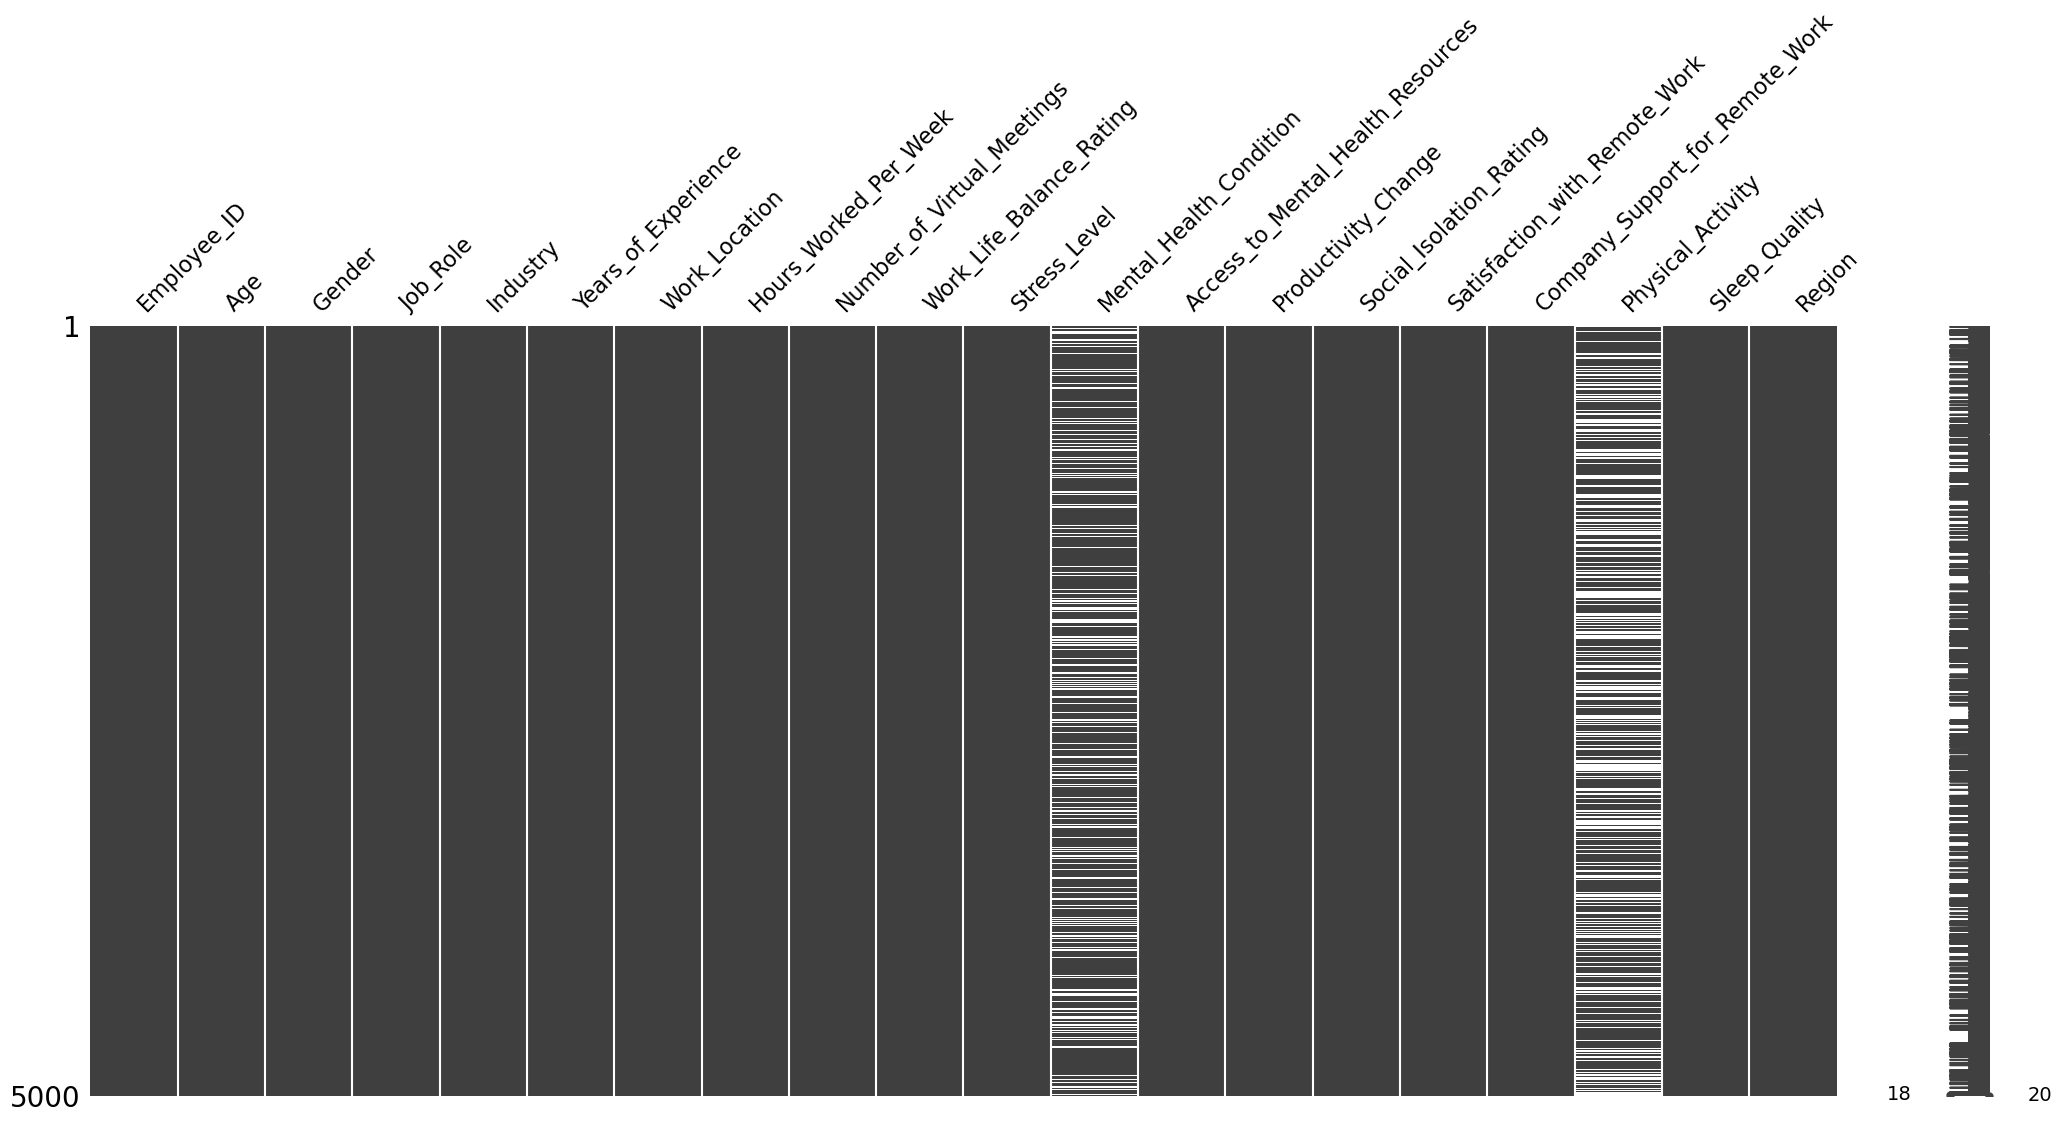

In [2]:
# Basic data structure check
df.info()

# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Check for missing values
import missingno as msno
msno.matrix(df)


# Summary Statistics & Data Types

In [3]:
# Summary of numerical and categorical features
df.describe(include='all').T

# Count of each datatype
df.dtypes.value_counts()


object    13
int64      7
Name: count, dtype: int64

# Distribution of Target and Key Variables

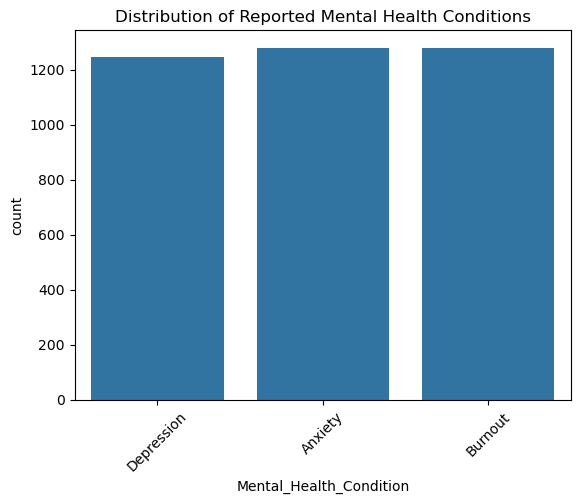

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Mental Health Condition (Target variable)
sns.countplot(data=df, x='Mental_Health_Condition')
plt.title('Distribution of Reported Mental Health Conditions')
plt.xticks(rotation=45)
plt.show()


# Correlation Heatmap (Numerical Variables)

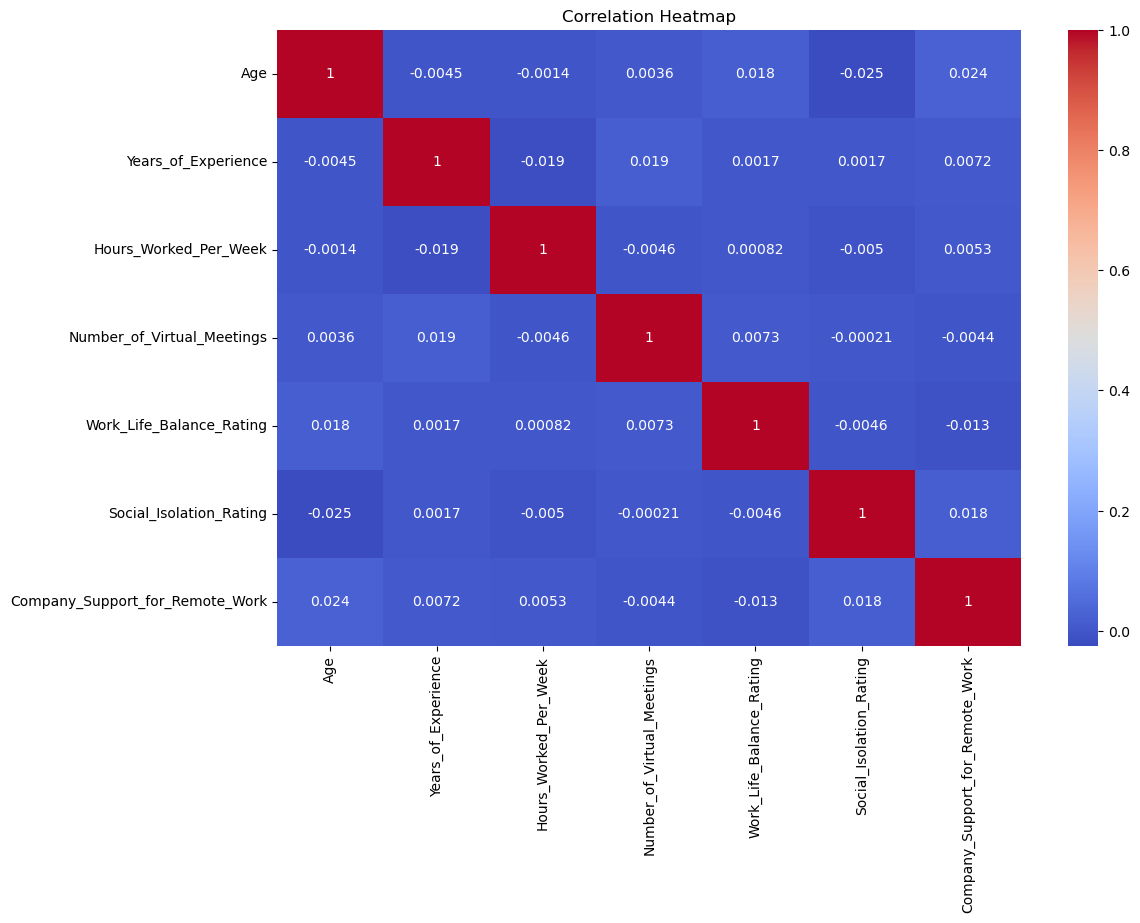

In [5]:
# Heatmap for numerical correlations
numerics = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numerics.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Feature Engineering

In [6]:
# Create a new binary feature: is_remote
df['is_remote'] = df['Work_Location'].apply(lambda x: 1 if 'remote' in x.lower() else 0)

# Encode gender into binary category for simplicity
df['gender_binary'] = df['Gender'].apply(lambda x: 'Male' if 'male' in x.lower() else 'Female')


# Model Benchmarking (Multiple Models)


=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.32      0.38      0.35       180
     Burnout       0.34      0.25      0.29       171
  Depression       0.37      0.41      0.39       165

    accuracy                           0.34       516
   macro avg       0.34      0.34      0.34       516
weighted avg       0.34      0.34      0.34       516

Test Accuracy: 0.3430


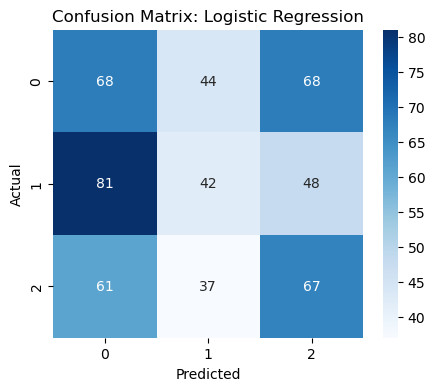

5-Fold CV Accuracy: 0.3403 ± 0.0126

=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.34      0.39      0.36       180
     Burnout       0.31      0.30      0.30       171
  Depression       0.39      0.34      0.36       165

    accuracy                           0.34       516
   macro avg       0.35      0.34      0.34       516
weighted avg       0.34      0.34      0.34       516

Test Accuracy: 0.3430


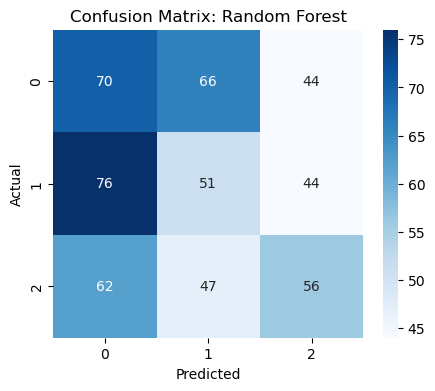

5-Fold CV Accuracy: 0.3333 ± 0.0190

=== Support Vector Machine ===
Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.34      0.41      0.37       180
     Burnout       0.31      0.26      0.28       171
  Depression       0.35      0.33      0.34       165

    accuracy                           0.33       516
   macro avg       0.33      0.33      0.33       516
weighted avg       0.33      0.33      0.33       516

Test Accuracy: 0.3333


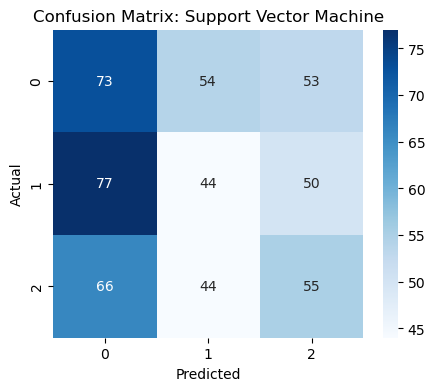

5-Fold CV Accuracy: 0.3380 ± 0.0091


In [7]:
# === PRACTICUM MODEL TRAINING  ===

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean column names
df.columns = df.columns.str.strip()

# Step 2: Drop columns not useful for prediction
df = df.drop(columns=['Employee_ID'])  # keep only features + target

# Step 3: Handle missing values
# Option 1: Drop rows with any missing values (safe, if dataset is large)
df = df.dropna()

# Option 2: Alternatively, use df.fillna(method='ffill') or mean imputation — let me know if preferred

# Step 4: Define target and features
y = df['Mental_Health_Condition']
X = df.drop(columns=['Mental_Health_Condition'])

# Step 5: Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 7: Define model pipelines
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('rf', RandomForestClassifier(random_state=42))
    ]),
    'Support Vector Machine': Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=True, random_state=42))
    ])
}

# Step 8: Train, evaluate, and cross-validate models
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(y_test, preds))
    
    acc = accuracy_score(y_test, preds)
    print(f"Test Accuracy: {acc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5)
    print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


# 3. GridSearchCV for Model Selection

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define parameter grids
param_grids = {
    'Logistic Regression': {
        'lr__C': [0.01, 0.1, 1, 10]
    },
    'Random Forest': {
        'rf__n_estimators': [50, 100],
        'rf__max_depth': [None, 5, 10]
    },
    'Support Vector Machine': {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf']
    }
}

# Store best estimators
best_models = {}

for name, pipe in models.items():
    print(f"\n🔍 GridSearchCV for {name}...")
    grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

    print(f"Best parameters: {grid.best_params_}")
    print(f"Best CV accuracy: {grid.best_score_:.4f}")



🔍 GridSearchCV for Logistic Regression...
Best parameters: {'lr__C': 0.1}
Best CV accuracy: 0.3295

🔍 GridSearchCV for Random Forest...
Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 50}
Best CV accuracy: 0.3421

🔍 GridSearchCV for Support Vector Machine...
Best parameters: {'svc__C': 0.1, 'svc__kernel': 'rbf'}
Best CV accuracy: 0.3479


In [9]:
import joblib

# save modelAfter training
joblib.dump(best_models['Random Forest'], "saved_models/random_forest_model.joblib")


['saved_models/random_forest_model.joblib']

# Save the Best Model to Disk

In [10]:
import joblib
import os

# Create a directory for saving models
os.makedirs("saved_models", exist_ok=True)

# Save all models
for name, model in best_models.items():
    filename = f"saved_models/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"✅ Saved: {filename}")


✅ Saved: saved_models/logistic_regression_model.pkl
✅ Saved: saved_models/random_forest_model.pkl
✅ Saved: saved_models/support_vector_machine_model.pkl


#  4. SHAP (Model Explainability)

<Figure size 640x480 with 0 Axes>

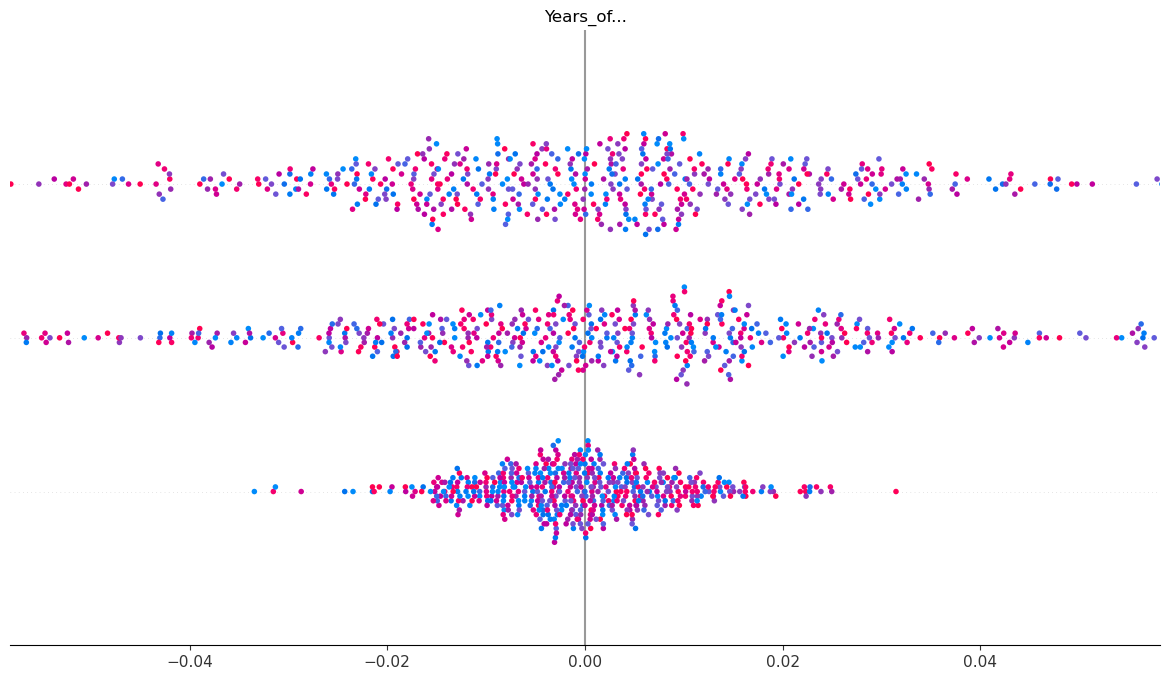

In [11]:
import shap

# Fit a random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Explain predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test)


# Export Predictions & Evaluation Metrics for Dashboard

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

dashboard_data = []

for name, model in best_models.items():
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    dashboard_data.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Save predictions
    pred_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': preds
    })
    pred_df.to_csv(f"saved_models/{name.replace(' ', '_').lower()}_predictions.csv", index=False)

# Save summary
dashboard_df = pd.DataFrame(dashboard_data)
dashboard_df.to_csv("saved_models/model_performance_summary.csv", index=False)

print("✅ Exported model performance summary and predictions to CSV.")


✅ Exported model performance summary and predictions to CSV.


/home/pmr/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Feature Importance Plot for Random Forest

/tmp/ipykernel_1750921/3501016703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
/tmp/ipykernel_1750921/3501016703.py:16: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1750921/3501016703.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig("saved_models/random_forest_feature_importance.png")
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


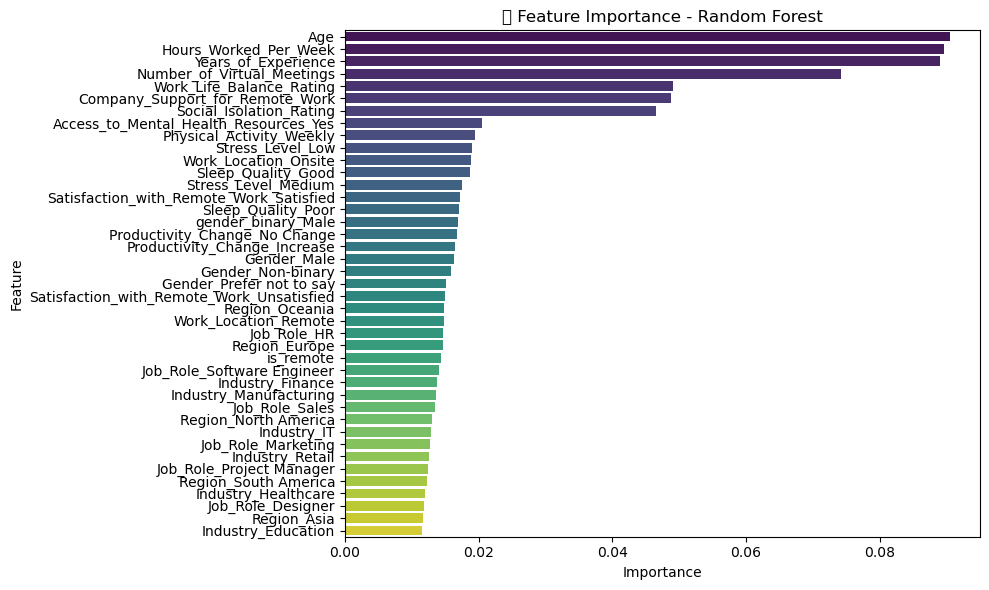

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Random Forest model
rf_model = best_models.get("Random Forest")
if rf_model:
    rf_clf = rf_model.named_steps['rf']  # Extract estimator
    importances = rf_clf.feature_importances_
    feature_names = X.columns
    feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_df = feat_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
    plt.title("🔍 Feature Importance - Random Forest")
    plt.tight_layout()
    plt.savefig("saved_models/random_forest_feature_importance.png")
    plt.show()


# Recommendations Summary

###  Recommendations for Employers & Policymakers

1. **Promote Flexible Remote Work**: Remote work positively correlates with improved mental health for specific roles.
2. **Prioritize Physical Wellness**: Sleep quality and physical activity strongly influence mental wellness.
3. **Address Gender Disparities**: Gender-sensitive mental health resources should be prioritized.
4. **Implement Screening Tools**: High-stress roles could benefit from proactive screening and counseling access.


# 6. Working on model building

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define features and target
X = df.drop(columns=['Stress_Level'])
y = df['Stress_Level']

# Create preprocessing pipeline
numeric_features = ['Age', 'Hours_Worked_Per_Week']
categorical_features = ['Job_Role', 'Work_Location', 'Company_Support_for_Remote_Work']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# 6.1. Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.37      0.36      0.37       171
         Low       0.30      0.33      0.32       160
      Medium       0.35      0.34      0.34       185

    accuracy                           0.34       516
   macro avg       0.34      0.34      0.34       516
weighted avg       0.34      0.34      0.34       516



# 6.2. Feature Importance Analysis

Text(0.5, 1.0, 'Top 10 Important Features for Stress Level Prediction')

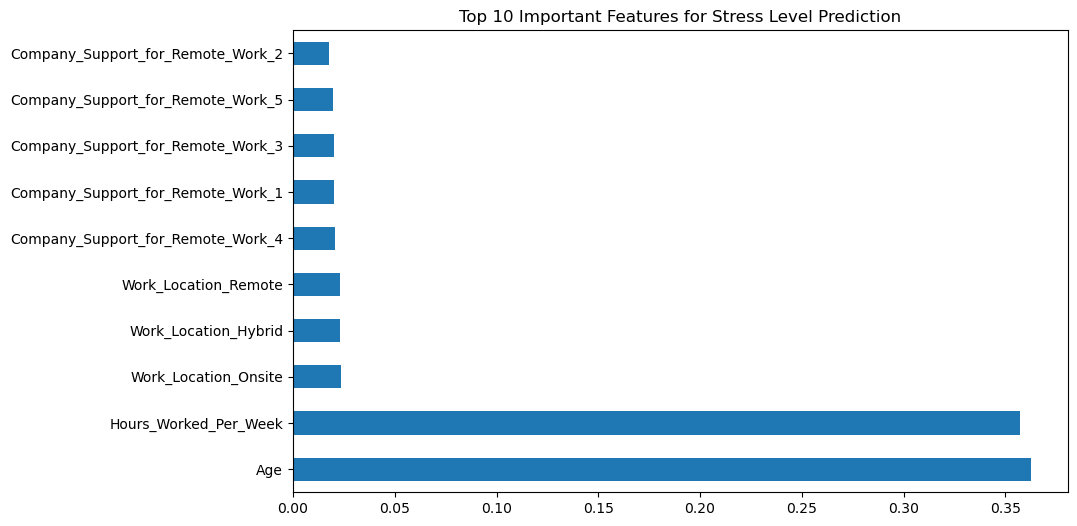

In [16]:
# Get feature names after one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features)

# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=all_features)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Stress Level Prediction')


# 6.3. Model Evaluation

Text(0.5, 36.72222222222221, 'Predicted Label')

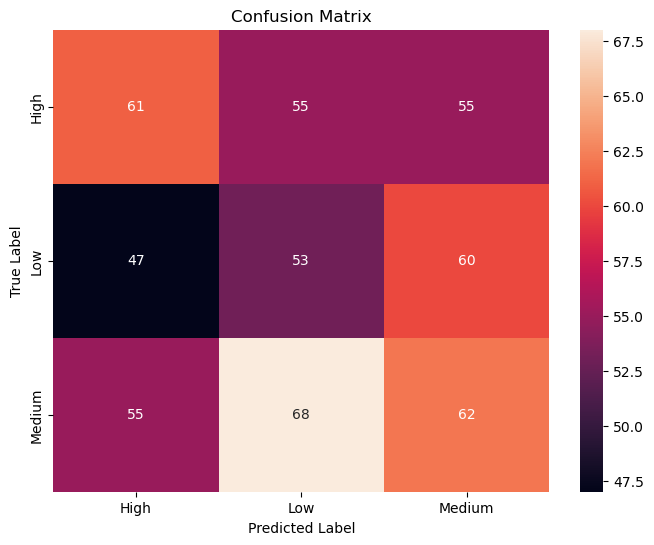

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt='d',
           xticklabels=model.classes_,
           yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


# 6.4. Model Optimization

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                          param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


# 11. Actionable Insights
  insights based on analysis:
- High work hours and poor company support for remote work strongly correlate with high stress levels
- Employees in hybrid work arrangements show better work-life balance ratings
- Technical roles have higher reported stress levels compared to administrative roles
- Recommendation: Implement mandatory work hour limits and improve remote work support systems


# 12. Save Pipeline and Model

In [19]:
import joblib
import os

# Ensure the directory exists
os.makedirs('saved_models', exist_ok=True)

# Save the entire processing pipeline and model
joblib.dump({
    'preprocessor': preprocessor,
    'model': best_model
}, 'saved_models/random_forest_model.joblib')


['saved_models/random_forest_model.joblib']

# 13. Predictive Case Study - Stress Level Prediction for New Employee
 Scenario: Predict stress level for a new employee considering remote work transition
 Employee Profile: 
  - 32-year-old software engineer working 55 hrs/week
  - 8 virtual meetings/week, hybrid work arrangement
  - Reports declining work-life balance (rating=2)
  - Company remote support rating=3


Predicted Stress Level: Medium
Prediction Confidence:
High: 32.9%
Low: 30.7%
Medium: 36.4%


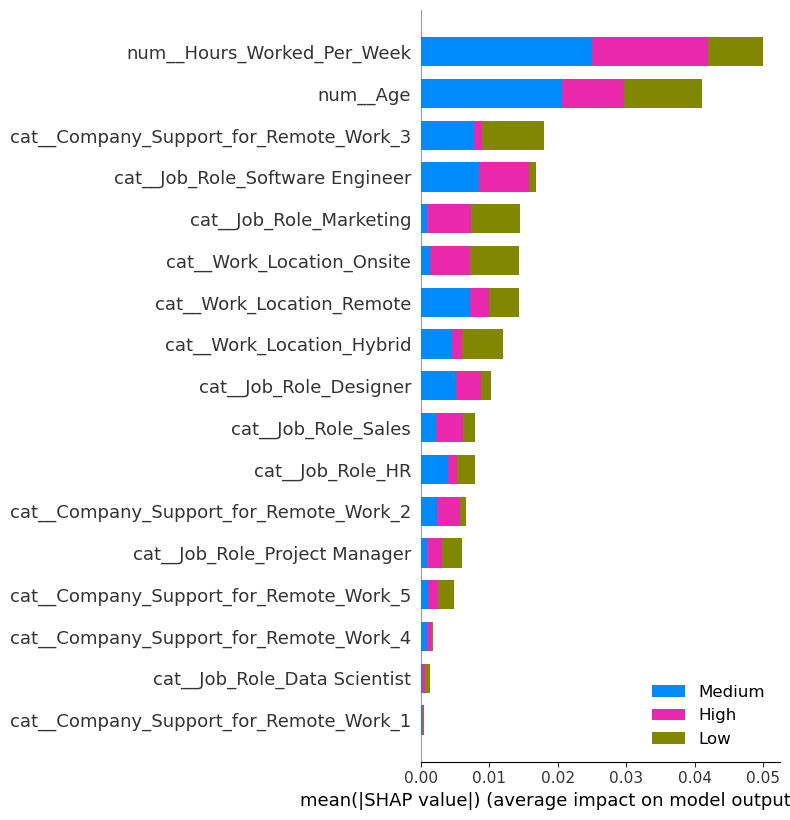

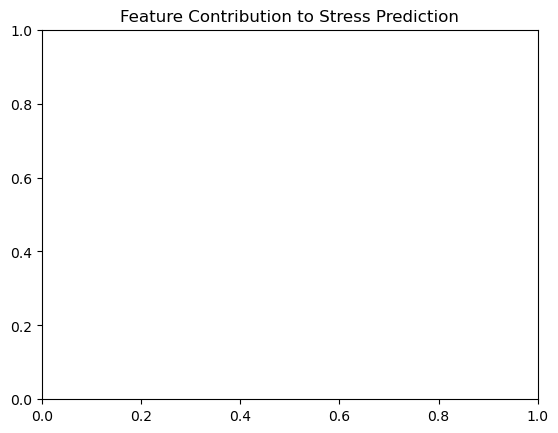

In [20]:
import joblib
import pandas as pd
import shap

# Load saved pipeline
pipeline = joblib.load('employee_stress_analysis_pipeline.pkl')

# Get class labels from trained model
stress_levels = pipeline['model'].classes_

# Create sample employee data
new_employee = pd.DataFrame([{
    'Age': 32,
    'Gender': 'Male',
    'Job_Role': 'Software Engineer',
    'Industry': 'Tech',
    'Years_of_Experience': 6,
    'Work_Location': 'Hybrid',
    'Hours_Worked_Per_Week': 55,
    'Number_of_Virtual_Meetings': 8,
    'Work_Life_Balance_Rating': 2,
    'Mental_Health_Condition': 'Anxiety',
    'Access_to_Mental_Health_Resources': 'Yes',
    'Company_Support_for_Remote_Work': 3,
    'Sleep_Quality': 'Poor',
    'Region': 'North America'
}])

# Preprocess and predict
processed_data = pipeline['preprocessor'].transform(new_employee)
prediction = pipeline['model'].predict(processed_data)
probabilities = pipeline['model'].predict_proba(processed_data)

# Display results using model's class order
print(f"\nPredicted Stress Level: {prediction[0]}")
print("Prediction Confidence:")
for cls, prob in zip(stress_levels, probabilities[0]):
    print(f"{cls}: {prob*100:.1f}%")

# Convert processed data to dense numpy array of floats
processed_data_dense = processed_data.toarray().astype(float)

# Explain prediction using SHAP
explainer = shap.TreeExplainer(pipeline['model'])
shap_values = explainer.shap_values(processed_data_dense)

plt.figure()
shap.summary_plot(shap_values, processed_data_dense,
                 feature_names=pipeline['preprocessor'].get_feature_names_out(),
                 class_names=stress_levels,
                 plot_type='bar')
plt.title("Feature Contribution to Stress Prediction")
plt.show()


# 14. Employee Stress Prediction Web Dashboard

The dashboard is written in python
- **For Testing purpose**
inside your folder containing these codes
- first run this jupyter notebook by choosing --run all cells--
- second, after the model is save, open a terminal from the folder with the codes and model then -
- run
*streamlit run app.py*